### 港区SCの夜間卓球ができるかどうかを判断する人工知能

休日は使わない想定で一旦作ってるけど、切り出す場所変えてあげれば十分このmodelでも対応できるはず。

PILを利用する場合は
pip install pillow
でもエラーが出る場合は、
pip install --force-reinstall Pillow==5.0.0
を試す。（ https://stackoverflow.com/questions/49887968/what-does-symbol-not-found-clock-gettime-mean-when-calling-a-python-2-7-scri )

URLから何かを読み込む場合はこれ。
pip install urllib3


In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [3]:
WIDTH = 64
HEIGHT = 64
CROP_X = 310 
CROP_Y = 240
CROP_WIDTH = 100
CROP_HEIGHT = 110
CHANNEL = 3

In [4]:
# 夜の時間帯も卓球できる
image_urls_0 = ["http://livedoor.blogimg.jp/minatoku_sposen/imgs/a/9/a90ccd4d.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/4/b/4b66e8d3.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/0/0/006c2333.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/0/6/06217cdc.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/9/9/994c33f6.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/d/0/d04d4563.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/b/e/be312b6b.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/b/f/bfd5fbdc.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/0/c/0cb38569.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/e/2/e28788dd.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/9/1/91e23986.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/f/4/f4513b47.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/1/f/1f8229f6.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/2/f/2fe7b0dc.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/4/c/4cfd197e.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/6/1/6154252c.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/7/e/7e38e816.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/b/c/bc0dfe1d.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/f/9/f99136fd.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/f/2/f28a6188.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/d/7/d7562db3.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/3/c/3c9e8efd.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/3/c/3c1276e0.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/a/6/a6d56427.png"]

# 夜の時間帯も卓球できるけど、一部できない
image_urls_1 = ["http://livedoor.blogimg.jp/minatoku_sposen/imgs/4/7/47590b6e.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/8/e/8e728429.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/4/e/4ebc3d81.png",  
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/6/7/67fe4059.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/4/d/4dd11652.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/2/b/2b038d94.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/3/3/33227bd8.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/2/f/2f359b8e.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/7/2/7213b7bf.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/3/d/3db58376.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/1/c/1c99c053.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/8/2/82145974.png"]
    
# 夜の時間帯も卓球できない
image_urls_2 = ["http://livedoor.blogimg.jp/minatoku_sposen/imgs/b/f/bfcc792b.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/e/5/e5ba8e84.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/a/b/ab4b4e6d.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/a/8/a8536024.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/6/e/6e7190a0.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/d/f/dfd3b931.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/b/a/ba80500b.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/3/f/3f1c9785.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/e/3/e312b795.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/f/9/f9743ed7.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/3/9/39a13efb.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/a/1/a1fb6f81.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/f/b/fb96aa4b.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/a/8/a841b1ae.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/4/1/41eb7d22.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/4/c/4ce1f54a.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/6/e/6e1346fe.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/4/0/40654137.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/8/3/83a7c32c.png",
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/4/4/44fd22d8.png"]

In [828]:
#  acc: 0.9643 まで到達 ( batch=4, epoch=9)
model = Sequential()
model.add(Conv2D(128, kernel_size=(4, 4), activation='relu', input_shape=(HEIGHT, WIDTH, CHANNEL)))
# model.add(Conv2D(8, kernel_size=(2, 2), activation='relu'))
model.add(Conv2D(4, kernel_size=(2, 2), activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

In [831]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(4, 4), activation='relu', input_shape=(CROP_HEIGHT, CROP_WIDTH, CHANNEL)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(4, 4), activation='relu'))
# model.add(Conv2D(8, kernel_size=(2, 2), activation='relu'))
model.add(Conv2D(4, kernel_size=(2, 2), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

In [18]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(4, 4), activation='relu', input_shape=(HEIGHT, WIDTH, CHANNEL)))
# model.add(MaxPooling2D(pool_size=(16, 16)))
model.add(Conv2D(4, kernel_size=(2, 2), activation='sigmoid'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

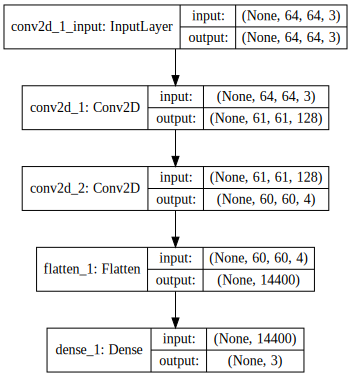

In [6]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import urllib3
import io
from urllib.request import urlopen

In [73]:
http = urllib3.PoolManager()
img_url = "http://livedoor.blogimg.jp/minatoku_sposen/imgs/4/7/47590b6e.png"
file =io.BytesIO(urlopen(img_url).read())
img = Image.open(file)
im = np.array(img)

In [74]:
im.shape

(589, 424, 3)

In [78]:
train_x = np.array([im])
train_y = np.array([[1,0,0]])
print(train_x.shape)
print(train_y.shape)

(1, 589, 424, 3)
(1, 3)


In [39]:
# model.fit(x=x_train, y=y_train, batch_size=3, epochs=10, verbose=1,
#           validation_data=(x_test, y_test), callbacks=[early_stopping])
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit(x=train_X, y=train_Y, batch_size=4, epochs=5, verbose=1, shuffle=1)

Epoch 1/5
56/56 [==============================] - 1s 19ms/step - loss: 0.1239 - acc: 0.9821
Epoch 2/5
56/56 [==============================] - 1s 17ms/step - loss: 0.1018 - acc: 1.0000
Epoch 3/5
56/56 [==============================] - 1s 17ms/step - loss: 0.0893 - acc: 1.0000
Epoch 4/5
56/56 [==============================] - 1s 19ms/step - loss: 0.0793 - acc: 1.0000
Epoch 5/5
56/56 [==============================] - 1s 19ms/step - loss: 0.0737 - acc: 1.0000


In [9]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1)

In [ ]:
model.fit_generator(datagen.flow(train_X, train_Y, batch_size=2),
                    steps_per_epoch=train_X.shape[0] // 2, epochs=10)

Epoch 1/10
28/28 [==============================] - 1s 43ms/step - loss: 0.3614 - acc: 0.9107
Epoch 2/10
28/28 [==============================] - 1s 43ms/step - loss: 0.1596 - acc: 0.9821
Epoch 3/10
28/28 [==============================] - 1s 53ms/step - loss: 0.1496 - acc: 0.9464
Epoch 4/10
28/28 [==============================] - 1s 48ms/step - loss: 0.1705 - acc: 0.9821
Epoch 5/10
28/28 [==============================] - 1s 50ms/step - loss: 0.2183 - acc: 0.9107
Epoch 6/10
28/28 [==============================] - 1s 53ms/step - loss: 0.4505 - acc: 0.8036
Epoch 7/10
28/28 [==============================] - 2s 57ms/step - loss: 0.4133 - acc: 0.8393
Epoch 8/10
28/28 [==============================] - 1s 50ms/step - loss: 0.2856 - acc: 0.9107
Epoch 9/10
 8/28 [=======>......................] - ETA: 0s - loss: 0.3884 - acc: 0.8750

In [40]:
http = urllib3.PoolManager()

# 夜間使えるやつ(0)
# 一部使えないやつ(1)
# 夜間使えないやつ(2)
img_urls = ["http://livedoor.blogimg.jp/minatoku_sposen/imgs/0/6/063bb318.png", #0,
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/3/b/3b9a2757.png", #0
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/f/d/fd92b031.png", #1
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/4/9/49741ac1.png", #1
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/2/1/2164e0d8.png", #2
            "http://livedoor.blogimg.jp/minatoku_sposen/imgs/8/1/81cf8424.png"] #2

for img_url in img_urls:
    file =io.BytesIO(urlopen(img_url).read())
    img = Image.open(file)
    img = img.crop((CROP_X, CROP_Y, CROP_X + CROP_WIDTH, CROP_Y + CROP_HEIGHT)).resize((WIDTH, HEIGHT))
    im = np.array(img)
    im = im[...,:CHANNEL]
    test_x = np.array([im])
    pred_y = model.predict(test_x)
    print(np.argmax(pred_y))

0
0
1
0
2
0


In [562]:
print(np.argmax(pred_y))

0


In [7]:
x_list = []
train_X = np.array([])
train_Y = np.array([])
for img_url in image_urls_0:
    http = urllib3.PoolManager()
    file =io.BytesIO(urlopen(img_url).read())
    img = Image.open(file)
    img = img.crop((CROP_X, CROP_Y, CROP_X + CROP_WIDTH, CROP_Y + CROP_HEIGHT)).resize((WIDTH, HEIGHT))
    im = np.array(img)
    im = im[...,:CHANNEL]
    train_X = np.append(train_X, im)
    train_Y = np.append(train_Y, np.array([1,0,0]))
 
for img_url in image_urls_1:
    http = urllib3.PoolManager()
    file =io.BytesIO(urlopen(img_url).read())
    img = Image.open(file)
    img = img.crop((CROP_X, CROP_Y, CROP_X + CROP_WIDTH, CROP_Y + CROP_HEIGHT)).resize((WIDTH, HEIGHT))
    im = np.array(img)
    im = im[...,:CHANNEL]
    train_X = np.append(train_X, im)
    train_Y = np.append(train_Y, np.array([0,1,0]))

for img_url in image_urls_2:
    http = urllib3.PoolManager()
    file =io.BytesIO(urlopen(img_url).read())
    img = Image.open(file)
    img = img.crop((CROP_X, CROP_Y, CROP_X + CROP_WIDTH, CROP_Y + CROP_HEIGHT)).resize((WIDTH, HEIGHT))
    im = np.array(img)
    im = im[...,:CHANNEL]
    train_X = np.append(train_X, im)
    train_Y = np.append(train_Y, np.array([0,0,1]))

total = len(image_urls_0) + len(image_urls_1) + len(image_urls_2)
    
train_X = train_X.reshape(total, HEIGHT, WIDTH, CHANNEL)
train_Y = train_Y.reshape(total, 3)

print(train_X.shape)
print(train_Y.shape)

(56, 64, 64, 3)
(56, 3)


In [269]:
img_url = "http://livedoor.blogimg.jp/minatoku_sposen/imgs/d/0/d04d4563.png"
file =io.BytesIO(urlopen(img_url).read())
img = Image.open(file).resize((WIDTH,HEIGHT))
w = 90
h = 120
im_crop = img.crop((310, 240, 315 + w, 240+h))
im_crop.show()

In [30]:
model.save('./minatoku_sc20180620013645.hdf5')

In [33]:
from keras.models import load_model
model2 = load_model("./minatoku_sc20180620013645.hdf5")

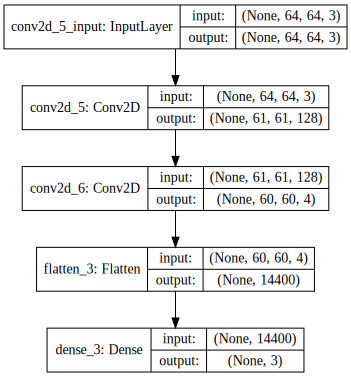

In [34]:
SVG(model_to_dot(model2, show_shapes=True).create(prog='dot', format='svg'))